In [117]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data exploration and cleaning

In [33]:
data = pd.read_csv("data/fitness.csv")
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [45]:
data.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [6]:
data.shape

(1500, 8)

In [22]:
data.category.unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [41]:
data.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category            13
attended             0
dtype: int64

In [31]:
data.category.value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
             13
Name: category, dtype: int64

In [57]:
data.day_of_week.unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat'], dtype=object)

In [56]:
data.day_of_week = ["Fri" if x == "Fri." else x for x in data.day_of_week]
data.day_of_week = ["Mon" if x == "Monday" else x for x in data.day_of_week]
data.day_of_week = ["Wed" if x == "Wednesday" else x for x in data.day_of_week]

In [35]:
data.category = [np.NaN if x == "-" else x for x in data.category] 

In [37]:
data.days_before.unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '20', '1', '15', '11', '16', '17', '29'], dtype=object)

In [36]:
data.days_before = [x.strip(" days") for x in data.days_before] 

In [39]:
data["days_before"] = data["days_before"].astype(int)

In [40]:
data.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [18]:
fig = px.scatter(data_frame=data, x=data.weight, y=data.months_as_member, color=data.attended)
fig.show()

In [19]:
fig = px.scatter(data_frame=data, x=data.days_before, y=data.months_as_member, color=data.attended)
fig.show()

In [42]:
px.histogram(data_frame=data, x=data.category, color=data.attended)

In [62]:
px.histogram(data_frame=data, x=data.day_of_week, color=data.attended)

In [44]:
px.histogram(data_frame=data, x=data.time, color=data.attended)

In [46]:
# encoding AM as 1 and PM as 0
data.time = [1 if x == "AM" else 0 for x in data.time]

In [48]:
data

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,0,Strength,0
1,2,10,79.01,2,Mon,1,HIIT,0
2,3,16,74.53,14,Sun,1,Strength,0
3,4,5,86.12,10,Fri,1,Cycling,0
4,5,15,69.29,8,Thu,1,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,1,HIIT,0
1496,1497,29,89.55,2,Mon,1,Strength,0
1497,1498,9,87.38,4,Tue,1,HIIT,0
1498,1499,34,68.64,14,Sun,1,Aqua,0


In [49]:
data.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                  int64
category             object
attended              int64
dtype: object

# Classification

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
# Encoding the day_of_week column
ohe = OneHotEncoder(sparse= False, handle_unknown='ignore')
feature_to_encode = data[["day_of_week"]]
ohe.fit_transform(feature_to_encode)
categories = ohe.categories_
days_of_week_encoded = pd.DataFrame(ohe.fit_transform(feature_to_encode), columns=ohe.categories_)
df_concat = pd.concat([data, days_of_week_encoded], axis=1)


In [73]:
# Encoding the category column
ohe = OneHotEncoder(sparse= False, handle_unknown='ignore')
feature_to_encode = data[["category"]]
ohe.fit_transform(feature_to_encode)
categories = ohe.categories_
category_encoded = pd.DataFrame(ohe.fit_transform(feature_to_encode), columns=ohe.categories_)
df_concat = pd.concat([df_concat, category_encoded], axis=1)

[array(['Aqua', 'Cycling', 'HIIT', 'Strength', 'Yoga', nan], dtype=object)]

In [93]:
# Feature and target selection
features = df_concat.drop(columns=["booking_id","day_of_week", "category", "attended"]).iloc[:,:-1]
features.fillna(features.mean(), inplace=True)
target = df_concat[["attended"]]

In [95]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)

## Baseline logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

Accuracy: 0.7644444444444445
F1 Score: 0.5546218487394958
Recall: 0.4342105263157895
Precision: 0.7674418604651163
Confusion Matrix:
 [[139  10]
 [ 43  33]]


<AxesSubplot:>

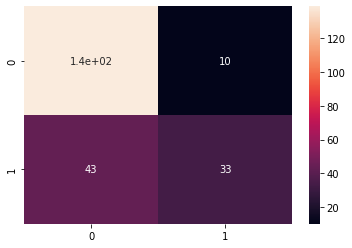

In [123]:
# LBFGS solver
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
y_true = y_test
y_pred = clf.predict(X_test)
print("Accuracy:", clf.score(X_test, y_test))
print("F1 Score:", f1_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
      
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

## Support Vector Machine

In [126]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_true = y_test
y_pred = svc.predict(X_test)
print("Accuracy:", svc.score(X_test, y_test))
print("F1 Score:", f1_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.7466666666666667
F1 Score: 0.4672897196261682
Recall: 0.32894736842105265
Precision: 0.8064516129032258
Confusion Matrix:
 [[143   6]
 [ 51  25]]


<AxesSubplot:>

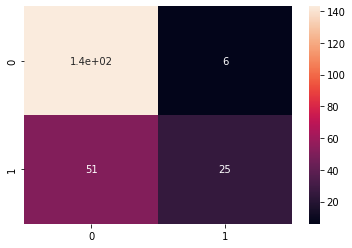

In [127]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

## Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_true = y_test
y_pred = clf.predict(X_test)
print("Accuracy:", clf.score(X_test, y_test))
print("F1 Score:", f1_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.72
F1 Score: 0.37623762376237624
Recall: 0.25
Precision: 0.76
Confusion Matrix:
 [[143   6]
 [ 57  19]]


<AxesSubplot:>

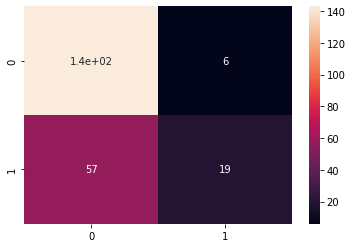

In [129]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

## Gradient Boosting Classifier

Accuracy: 0.76
F1 Score: 0.5970149253731344
Recall: 0.5263157894736842
Precision: 0.6896551724137931
Confusion Matrix:
 [[131  18]
 [ 36  40]]


<AxesSubplot:>

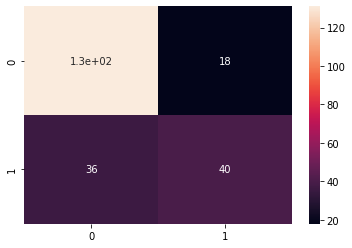

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_true = y_test
y_pred = clf.predict(X_test)
print("Accuracy:", clf.score(X_test, y_test))
print("F1 Score:", f1_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)